In [11]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, random_split

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [12]:
import sklearn.datasets

In [13]:
mnist = sklearn.datasets.fetch_openml('mnist_784', data_home="mnist_784")

In [14]:
class MnistDataset(Dataset):

  def __init__(self, data):
    self.data_set = data
    pass
  
  def __len__(self):
    return len(self.data_set.data)
  
  def __getitem__(self, index):
    # 이미지 목표 (레이블)
    label = self.data_set.target[index]
    # 길이는 10, 정답만 1.0으로 표시된 텐서
    target = torch.zeros((10))
    target[int(label)] = 1.0

    # 0-255의 이미지를 0-1로 정규화
    image_values = torch.FloatTensor(self.data_set.data.iloc[index].values) / 255.0

    # 레이블, 이미지 데이터 텐서, 목표 텐서 반환
    return label, image_values, target
  
  def plot_image(self, index):
    img = self.data_set.data.iloc[index].values.reshape(28, 28)
    plt.title("label = " + str(self.data_set.target[index]))
    plt.imshow(img, interpolation='none', cmap='Blues')
    pass
  
  pass

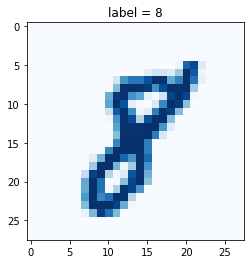

In [15]:
mnist_dataset = MnistDataset(mnist)
mnist_dataset.plot_image(17)

In [16]:
train_dataset, test_dataset = random_split(mnist_dataset, [60000, 10000])

In [17]:
class View(nn.Module):
  def __init__(self, shape):
    super().__init__()
    self.shape = shape,
  
  def forward(self, x):
    return x.view(*self.shape)

In [33]:
# 분류기 클래스
class Classifier(nn.Module):

  def __init__(self):
    # 파이토치 부모 클래스 초기화
    super().__init__()

    # 신경망 레이어 정의
    self.model = nn.Sequential(
        nn.Conv2d(1, 10, kernel_size=5, stride=2),
        nn.LeakyReLU(0.02),
        nn.BatchNorm2d(10),

        nn.Conv2d(10, 10, kernel_size=3, stride=2),
        nn.LeakyReLU(0.02),
        nn.BatchNorm2d(10),

        View(250),
        nn.Linear(250, 10),
        nn.Sigmoid()
    )

    # 손실함수 설정
    self.loss_function = nn.BCELoss()

    # SGD 옵티마이저 설정
    # self.parameters() 모든 학습 파라미터
    self.optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)

    # 진행 측정을 위한 변수 초기화
    self.counter = 0;
    self.progress = []

    pass
  
  def forward(self, inputs):
    # 모델 실행
    return self.model(inputs)
  

  def train(self, inputs, targets):
    # 신경망 출력 계산
    outputs = self.forward(inputs)

    # 손실 계산
    loss = self.loss_function(outputs, targets)

    # 카운터를 증가시키고 10회마다 오차 저장
    self.counter += 1;
    if (self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass
    if (self.counter % 10000 == 0):
      print("counter = ", self.counter)
      pass
    
    # 기울기를 초기화하고 역전파 후 가중치 갱신
    self.optimizer.zero_grad()   # 계산 그래프의 기울기 0으로 초기화
    loss.backward()   # 신경망의 기울기
    self.optimizer.step()   # 위 기울기는 이 코드를 통해서 신경망의 학습 파라미터를 갱신하는데에 사용됨

    pass
  
  def plot_progress(self):
    df = pd.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
    pass

In [34]:
# 분류기 훈련

C = Classifier()

epochs = 3

for epoch in range(epochs):
  print ("epoch = ", epoch + 1)

  for label, image_data_tensor, target_tensor in train_dataset:
    C.train(image_data_tensor.view(1, 1, 28, 28), target_tensor)
    pass
  
  pass

epoch =  1
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
epoch =  2
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
epoch =  3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000


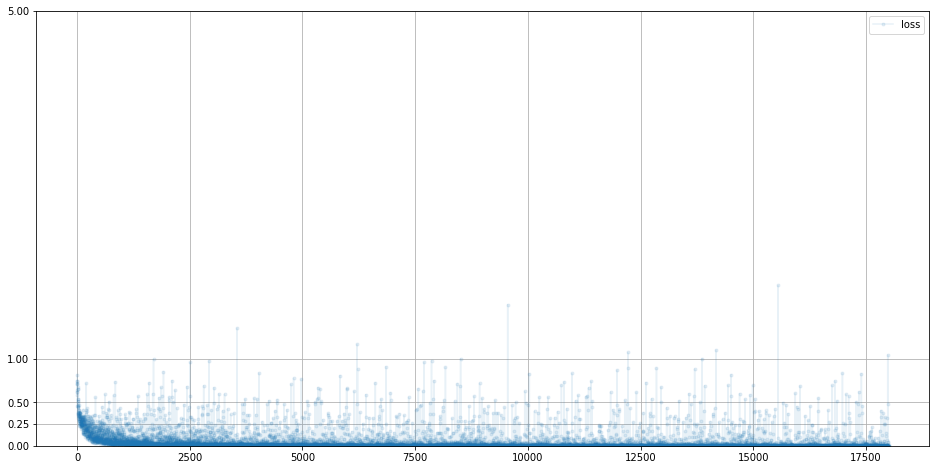

In [35]:
# plot classifier error

C.plot_progress()

In [37]:
# classifier performance

score = 0
items = 0

for label, image_data_tensor, target_tensor in test_dataset:
  answer = C.forward(image_data_tensor.view(1, 1, 28, 28)).detach().numpy()
  if (answer.argmax() == int(label)):
    score += 1
    pass
  items += 1
  pass

print(score, items, score/items)

9779 10000 0.9779
